In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_raw = pd.read_csv('./kaggle_data/1_titanic_data/train.csv', encoding='utf-8')
print(train_raw.shape)
train_raw.head(3)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
test_raw = pd.read_csv('./kaggle_data/1_titanic_data/test.csv', encoding='utf-8')
test_raw['Survived']= 0
test_raw= test_raw[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
print(test_raw.shape)
test_raw.head(3)


(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
print(train_raw.shape)  # (891, 12)
print(test_raw.shape) # (418, 12)  key 892
test_raw_start= test_raw.shape[0]

(891, 12)
(418, 12)


In [5]:
data = pd.concat([train_raw, test_raw]) 
data.shape

(1309, 12)

In [6]:
data.reset_index(inplace= True)
data.drop('index', axis=1, inplace= True)
print(data.shape)
data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#data.isnull().any()
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
# 데이터 NaN값, 이상치 제거

In [9]:
data.loc[data[data['Fare'].isnull()== True].index, 'Fare'] = 14.4

In [10]:
data['Initial']=0
for i in data:
    data['Initial']= data.Name.str.extract('([A-Za-z]+)\.')

In [11]:
pd.crosstab(data.Sex, data.Initial).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [12]:
df_temp= pd.crosstab(data.Sex, data.Initial)
print(df_temp.columns[df_temp.iloc[0] > 0 ])
print(df_temp.columns[df_temp.iloc[1] > 0])

# Countess 백작부인

data['Initial'].replace(['Countess', 'Dona', 'Lady', 'Mlle', 'Mme', 'Ms'], 
                        ['Mrs', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Miss'], inplace= True)

data['Initial'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 
                        ['Other', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Other', 'Mr'], inplace= True)

Index(['Countess', 'Dona', 'Dr', 'Lady', 'Miss', 'Mlle', 'Mme', 'Mrs', 'Ms'], dtype='object', name='Initial')
Index(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Master', 'Mr', 'Rev',
       'Sir'],
      dtype='object', name='Initial')


In [13]:
print(data.groupby('Initial')['Age'].mean())
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] =  5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] =  22
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] =  33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] =  36
data.loc[(data.Age.isnull())& (data.Initial=='Other'),'Age']= 46


Initial
Master     5.482642
Miss      21.834533
Mr        32.635678
Mrs       37.046243
Other     44.444444
Name: Age, dtype: float64


In [14]:
# Embarked: Port of Embarkation
data['Embarked'].fillna('S', inplace= True)
data.Embarked.isnull().any()

False

In [15]:
# observation for all features

# feature engineering and data cleaning

In [16]:
# Age band

# maximum age = 80, divide the range from 0-80 into 5 bins.
# so 80/5 = 16, bins of size is 16
# x<16 0 16<= x<32사이 1, 32<=x <48사이 2, 
# 48<=x <64사이 3, x>64 4
bins= np.arange(16,80,16)
print(bins)
which_bin= np.digitize(data['Age'], bins= bins)
data['Age_band']= pd.Series(which_bin, index= data.index)

[16 32 48 64]


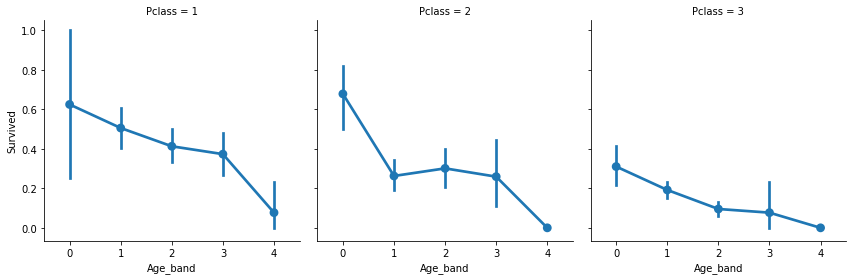

In [17]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

In [18]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,570
2,483
0,123
3,115
4,18


In [19]:
# Family size and Alone

data['Family_Size']= 0
data['Family_Size']= data['Parch']+data['SibSp']
data['Alone']= 0
data.loc[data.Family_Size==0, 'Alone']= 1



In [20]:
# Fare range

# Pclass  Embarked
# 1       C           106.845330
#         Q            90.000000
#         S            72.148094
# 2       C            23.300593
#         Q            11.735114
#         S            21.206921
# 3       C            11.021624
#         Q            10.390820
#         S            14.435422

print(data['Fare'].max())
data['Fare_Range']= pd.qcut(data['Fare'],10)
data.groupby(['Fare_Range'])['Survived'].mean()


512.3292


Fare_Range
(-0.001, 7.57]      0.099237
(7.57, 7.854]       0.180556
(7.854, 8.05]       0.130137
(8.05, 10.5]        0.166667
(10.5, 14.454]      0.279070
(14.454, 21.558]    0.291339
(21.558, 26.82]     0.343511
(26.82, 41.579]     0.276119
(41.579, 78.02]     0.351562
(78.02, 512.329]    0.503817
Name: Survived, dtype: float64

In [21]:
data['Fare_Range'].value_counts()

(7.854, 8.05]       146
(7.57, 7.854]       144
(26.82, 41.579]     134
(78.02, 512.329]    131
(21.558, 26.82]     131
(-0.001, 7.57]      131
(10.5, 14.454]      129
(41.579, 78.02]     128
(14.454, 21.558]    127
(8.05, 10.5]        108
Name: Fare_Range, dtype: int64

In [22]:
data['Fare_Range_str']= data['Fare_Range'].astype(np.str)

In [23]:
fare_cat_dict={}

for i,j in enumerate(data['Fare_Range_str'].unique()):
    fare_cat_dict[j]= i
    
print(fare_cat_dict)
data['Fare_cat'] = data['Fare_Range_str'].map(fare_cat_dict)

{'(-0.001, 7.57]': 0, '(41.579, 78.02]': 1, '(7.854, 8.05]': 2, '(8.05, 10.5]': 3, '(14.454, 21.558]': 4, '(10.5, 14.454]': 5, '(26.82, 41.579]': 6, '(21.558, 26.82]': 7, '(7.57, 7.854]': 8, '(78.02, 512.329]': 9}


In [24]:
data['Cabin'].fillna('Z', inplace= True)

# Cabin 유무, Age 유무
cabin_list=[]
for i in data['Cabin'].values:
    if i== 'Z':
        cabin_list.append(0)
    else:
        cabin_list.append(1)

data['Cabin_unknown']= pd.Series(cabin_list, index= data.index)    

In [25]:
data['Cabin_unknown'].value_counts()

0    1014
1     295
Name: Cabin_unknown, dtype: int64

In [26]:
# 문자열 라벨화
data['Sex'].replace(['male', 'female'], [0,1], inplace= True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace= True)
data['Initial'].replace(['Mr','Mrs','Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True )

In [27]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare_Range', 'Fare_Range_str'], axis=1, inplace= True)
# 필요없는 특성
# passengerId , Name, ticket, cabin , fare_range , fare_range_str
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Cabin_unknown
0,0,3,0,22.0,1,0,7.2500,0,0,1,1,0,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,2,1,0,1,1
2,1,3,1,26.0,0,0,7.9250,0,2,1,0,1,2,0
3,1,1,1,35.0,1,0,53.1000,0,1,2,1,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,2,0,1,2,0


In [28]:
data1= data.copy()

In [29]:
data1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Initial', 'Age_band', 'Family_Size', 'Alone', 'Fare_cat',
       'Cabin_unknown'],
      dtype='object')

In [30]:
# skew 확인
col_list=['Age', 'SibSp', 'Parch', 'Fare',
          'Initial', 'Age_band', 'Family_Size', 'Fare_cat']
for col in col_list:
    print(col, ':', data1[col].skew())

Age : 0.3580896815454647
SibSp : 3.844220342922907
Parch : 3.6690782036511136
Fare : 4.3695078100296465
Initial : 1.0408964669617493
Age_band : 0.3493916816687381
Family_Size : 2.853078440912559
Fare_cat : -0.029359136163389976


In [31]:
col_list=['Pclass', 'SibSp', 'Parch', 'Embarked', 
          'Initial', 'Age_band', 'Family_Size', 'Fare_cat', 'Cabin_unknown']
for col in col_list:
    print(col, ':', data1[col].unique())

Pclass : [3 1 2]
SibSp : [1 0 3 4 2 5 8]
Parch : [0 1 2 5 3 4 6 9]
Embarked : [0 1 2]
Initial : [0 1 2 3 4]
Age_band : [1 2 3 0 4]
Family_Size : [ 1  0  4  2  6  5  3  7 10]
Fare_cat : [0 1 2 3 4 5 6 7 8 9]
Cabin_unknown : [0 1]


In [32]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Cabin_unknown
0,0,3,0,22.0,1,0,7.2500,0,0,1,1,0,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,2,1,0,1,1
2,1,3,1,26.0,0,0,7.9250,0,2,1,0,1,2,0
3,1,1,1,35.0,1,0,53.1000,0,1,2,1,0,1,1
4,0,3,0,35.0,0,0,8.0500,0,0,2,0,1,2,0


In [33]:
# 로그
# 'SibSp', 'Parch', 'Fare', 'Family_Size'
# 스케일링 특성
# 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Fare_cat'

# 로그
log_list=['Fare', 'Family_Size']
for col in log_list:
    data1[col]= np.log(data1[col]+1)

# 스케일링
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scale_col=['Age', 'Fare', 'Family_Size']

for col in scale_col:
    scaler= RobustScaler()
    data1[col]= scaler.fit_transform(data1[col].values.reshape(-1,1)).reshape(-1,)
    



In [34]:
data1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Cabin_unknown
1304,0,3,0,0.214286,0,0,-0.415233,0,0,2,0.000000,1,2,0
1305,0,1,1,0.642857,0,0,1.522208,1,1,2,0.000000,1,9,1
1306,0,3,0,0.607143,0,0,-0.487050,0,0,2,0.000000,1,0,0
1307,0,3,0,0.214286,0,0,-0.415233,0,0,2,0.000000,1,2,0
1308,0,3,0,-1.785714,1,1,0.320530,1,3,0,1.584963,0,7,0


In [100]:
# 특성조합하여 df를 여러개만든다.

data_dict={}

for i in range(5):
    data_dict[i]= data1.copy()


In [103]:
# 원핫인코딩1 'Pclass', 'Embarked', 'Initial', 'Age_band'
# 원핫인코딩2 'SibSp', 'Parch', 'Initial', 'Age_band', 'Fare_cat'

df_pc = pd.get_dummies(data1['Pclass'], prefix= 'pc')
df_si = pd.get_dummies(data1['SibSp'], prefix= 'si')
df_pa = pd.get_dummies(data1['Parch'], prefix= 'pa')
df_em = pd.get_dummies(data1['Embarked'], prefix= 'em')
df_in = pd.get_dummies(data1['Initial'], prefix= 'in')
df_ag = pd.get_dummies(data1['Age_band'], prefix= 'ag')
df_fa = pd.get_dummies(data1['Fare_cat'], prefix= 'fa')

In [104]:
data_dict[1]= data_dict[1].join(df_pc)
data_dict[1]= data_dict[1].join(df_em)
data_dict[1]= data_dict[1].join(df_in)
data_dict[1]= data_dict[1].join(df_ag)
data_dict[1].drop(['Pclass','Embarked','Initial','Age_band'], axis=1, inplace= True)
data_dict[1].head()


,Survived,Sex,Age,SibSp,Parch,Fare,Family_Size,Alone,Fare_cat,Cabin_unknown,...,in_0,in_1,in_2,in_3,in_4,ag_0,ag_1,ag_2,ag_3,ag_4
0,0,0,-0.571429,1,0,-0.487050,1.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0.571429,1,0,1.197095,1.0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
2,1,1,-0.285714,0,0,-0.426025,0.0,1,2,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,0.357143,1,0,0.972251,1.0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0.357143,0,0,-0.415233,0.0,1,2,0,...,1,0,0,0,0,0,0,1,0,0


In [105]:
data_dict[2]= data_dict[2].join(df_pc)
data_dict[2]= data_dict[2].join(df_em)
data_dict[2]= data_dict[2].join(df_in)
data_dict[2]= data_dict[2].join(df_ag)
data_dict[2].drop(['Pclass','Embarked','Initial','Age_band'], axis=1, inplace= True)
data_dict[2].drop(['Age', 'Fare'], axis=1, inplace= True)
data_dict[2].head()


,Survived,Sex,SibSp,Parch,Family_Size,Alone,Fare_cat,Cabin_unknown,pc_1,pc_2,...,in_0,in_1,in_2,in_3,in_4,ag_0,ag_1,ag_2,ag_3,ag_4
0,0,0,1,0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,1,0,1.0,0,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,0.0,1,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,1,1,0,1.0,0,1,1,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0.0,1,2,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [107]:
data_dict[3]= data_dict[3].join(df_pc)
data_dict[3]= data_dict[3].join(df_si)
data_dict[3]= data_dict[3].join(df_pa)
data_dict[3]= data_dict[3].join(df_em)
data_dict[3]= data_dict[3].join(df_in)
data_dict[3]= data_dict[3].join(df_ag)
data_dict[3]= data_dict[3].join(df_fa)
data_dict[3].drop(['Pclass','SibSp','Parch','Embarked','Initial','Age_band','Fare_cat'], axis=1, inplace= True)
data_dict[3].head()



,Survived,Sex,Age,Fare,Family_Size,Alone,Cabin_unknown,pc_1,pc_2,pc_3,...,fa_0,fa_1,fa_2,fa_3,fa_4,fa_5,fa_6,fa_7,fa_8,fa_9
0,0,0,-0.571429,-0.487050,1.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0.571429,1.197095,1.0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,-0.285714,-0.426025,0.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0.357143,0.972251,1.0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0.357143,-0.415233,0.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [108]:
data_dict[4].drop(['Age', 'Fare'], axis=1, inplace= True)
data_dict[4].head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Cabin_unknown
0,0,3,0,1,0,0,0,1,1.0,0,0,0
1,1,1,1,1,0,1,1,2,1.0,0,1,1
2,1,3,1,0,0,0,2,1,0.0,1,2,0
3,1,1,1,1,0,0,1,2,1.0,0,1,1
4,0,3,0,0,0,0,0,2,0.0,1,2,0


In [41]:
# 인코딩 함수화
# 스케일링 함수화
# 학습/테스트셋 생성 함수화

# 각 5개의 모델 학습후 각각의 결과df에 저장 -> 합치기, 평균 -> 0.5이상 1 이하 0으로 판단

In [42]:
#data1.drop(['Age', 'Fare', 'Family_Size'], axis=1, inplace= True)

In [43]:
data1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat,Cabin_unknown
0,0,3,0,-0.571429,1,0,-0.487050,0,0,1,1.000000,0,0,0
1,1,1,1,0.571429,1,0,1.197095,1,1,2,1.000000,0,1,1
2,1,3,1,-0.285714,0,0,-0.426025,0,2,1,0.000000,1,2,0
3,1,1,1,0.357143,1,0,0.972251,0,1,2,1.000000,0,1,1
4,0,3,0,0.357143,0,0,-0.415233,0,0,2,0.000000,1,2,0
5,0,3,0,0.214286,0,0,-0.380991,2,0,2,0.000000,1,3,0
6,0,1,0,1.714286,0,0,0.954295,0,0,3,0.000000,1,1,1
7,0,3,0,-2.000000,3,1,0.276683,0,3,0,2.321928,0,4,0
8,1,3,1,-0.214286,0,2,-0.187728,0,1,1,1.584963,0,5,0
9,1,2,1,-1.142857,1,0,0.541926,1,1,0,1.000000,0,6,0


# predictive modeling

In [109]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

import keras
from keras import layers, models, optimizers
import random as rd
from keras.layers import Dense, BatchNormalization, Activation, Dropout
from sklearn.metrics import accuracy_score
from keras.utils import np_utils

In [117]:
# dt1 Age, Fare포함 중요특성만 인코딩  # 30,20 / 100,100
# dt2 Age, Fare삭제 중요특성만 인코딩  # 20,10 / 70,100
# dt3 모두 인코딩 # 40,20 / 40,100
# dt0, SVM
# dt4. Ada모델
# dt5. Age, Fare삭제, 중요특성 인코딩 Age_band10/5, Fare_cat10/4 
# dt6. 모두인코딩, Age_band10/5, Fare_cat10/4 

idx = 1

data_train =data_dict[idx].iloc[:-1*test_raw_start].copy()
data_test =data_dict[idx].iloc[-1*test_raw_start:].copy()
X= data_train[data_train.columns[1:]]
X1= data_test[data_test.columns[1:]]
Y= data_train['Survived']
Y1= data_test['Survived']

node_num= {1:[40,20], 2:[20,10], 3:[40,20]}
ep_num = {1:100, 2:70, 3:40}



In [118]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.1, random_state=0, shuffle= False)
print(train_X.shape)
print(test_X.shape)
print(X.shape)

train_Y_enc = np_utils.to_categorical(train_Y)
test_Y_enc = np_utils.to_categorical(test_Y)
Y_enc = np_utils.to_categorical(Y)

(801, 25)
(90, 25)
(891, 25)


In [119]:
# 모델1

np.random.seed(5)

keras.backend.clear_session()
model = keras.models.Sequential()

# 40, 20, 10 : 0.8427  0.8246
# 40, 20  :0.8812 0.8507 (epochs=200, batch_size = 200)
# 40, 20  :0.8668 0.8657 (epochs=120, batch_size = 200)
# 80,40,10 : 0.8939 0.8333(epochs=30, batch_size = 100) 전부인코딩

# 25,20,10 : 0.8602 0.8778  (epochs=100, batch_size = 100)
# 30,20, : 0.8552 0.9000 (epochs=100, batch_size = 100) 0.8700 0.8582



model.add( layers.Dense(node_num[idx][0], input_shape=(train_X.shape[1],), activation='relu' ))
model.add( layers.Dense(node_num[idx][1], activation='relu' ))
#model.add( layers.Dense(node_num[idx][2], activation='relu' ))
model.add( layers.Dense(2, activation = 'softmax'))

adam = optimizers.Adam(lr=0.01, decay=0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 1,902
Trainable params: 1,902
Non-trainable params: 0
_________________________________________________________________


In [120]:
history = model.fit(train_X, train_Y_enc, epochs= ep_num[idx], verbose=1, batch_size = 100,
                    validation_data=(test_X, test_Y_enc))



Train on 801 samples, validate on 90 samples
Epoch 1/100
801/801 [==============================] - 0s 393us/step - loss: 0.7536 - acc: 0.4270 - val_loss: 0.7238 - val_acc: 0.4667
Epoch 2/100
801/801 [==============================] - 0s 10us/step - loss: 0.6928 - acc: 0.5531 - val_loss: 0.6850 - val_acc: 0.5889
Epoch 3/100
801/801 [==============================] - 0s 12us/step - loss: 0.6619 - acc: 0.6042 - val_loss: 0.6327 - val_acc: 0.6667
Epoch 4/100
801/801 [==============================] - 0s 10us/step - loss: 0.6210 - acc: 0.6767 - val_loss: 0.6014 - val_acc: 0.8222
Epoch 5/100
801/801 [==============================] - 0s 10us/step - loss: 0.6080 - acc: 0.7391 - val_loss: 0.5785 - val_acc: 0.8111
Epoch 6/100
801/801 [==============================] - 0s 11us/step - loss: 0.5914 - acc: 0.7553 - val_loss: 0.5525 - val_acc: 0.8000
Epoch 7/100
801/801 [==============================] - 0s 10us/step - loss: 0.5731 - acc: 0.7778 - val_loss: 0.5266 - val_acc: 0.8333
Epoch 8/100
801/

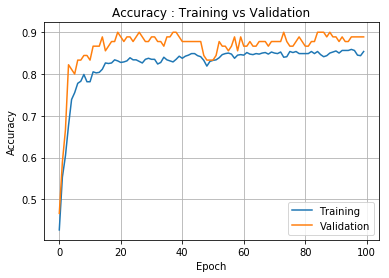

In [121]:
if not isinstance(history, dict):
    history = history.history

plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.grid()
plt.show()

In [82]:
# 서브미션 테스트 셋
pred_sub = model.predict(X1)
single_pred_sub = pred_sub.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [83]:
result_df= pd.DataFrame(single_pred_sub, columns=['pred'])
result_df.to_csv('./kaggle_data/1_titanic_data/result_sub_titan.csv')

In [122]:
# 교차검증
from sklearn.model_selection import StratifiedKFold

n_fold= 10
skfolds= StratifiedKFold(n_splits= n_fold, random_state= 42)

accuracy= []

for train_index, test_index in skfolds.split(X, Y):
    #print(X.iloc[train_index])
    
    np.random.seed(5)
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add( layers.Dense(node_num[idx][0], input_shape=(train_X.shape[1],), activation='relu' ))
    model.add( layers.Dense(node_num[idx][1], activation='relu' ))
    #model.add( layers.Dense(node_num[idx][2], activation='relu' ))
    model.add( layers.Dense(2, activation = 'softmax'))
    adam = optimizers.Adam(lr=0.005, decay=0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    model.fit(X.iloc[train_index], Y_enc[train_index], epochs= ep_num[idx], batch_size = 100, verbose=0)
    
    # k_accuracy = "%.4f" % (model.evaluate(X.iloc[test_index], Y_enc[test_index])[1])
    # k_accuracy = model.evaluate(X.iloc[test_index], Y_enc[test_index], batch_size = 100)[1]
    pred_train = model.predict(X.iloc[test_index])
    single_pred_train = pred_train.argmax(axis=1)
    k_accuracy = accuracy_score(Y_enc[test_index].argmax(axis=1), single_pred_train)    
    accuracy.append(k_accuracy)
    
print("fold accuracy:" , accuracy)  
print("mean:" , np.array(accuracy).mean())

# mean: 0.8193842923618204, 라벨
# mean: 0.8250025536261492 , 연속, 라벨
# mean: 0.8137033253887186 , 
# mean: 0.8283454743212874, 0.8328841504695212, 에포크 200->120

# fold accuracy: [0.7888888888888889, 0.8222222222222222, 0.7528089887640449, 0.8764044943820225, 0.8426966292134831, 0.7865168539325843,
#                 0.8314606741573034, 0.797752808988764, 0.8651685393258427, 0.8863636363636364]

# fold accuracy: [0.8, 0.8111111111111111, 0.7752808988764045, 0.8539325842696629, 0.8876404494382022, 0.8314606741573034, 0.8539325842696629,
#                 0.8089887640449438, 0.9213483146067416, 0.875]

# fold accuracy: [0.7988826815642458, 0.7821229050279329, 0.8595505617977528, 0.8146067415730337, 0.8983050847457628]
# mean: 0.8306935949417456

# fold accuracy: [0.8222222222222222, 0.8777777777777778, 0.7640449438202247, 0.8764044943820225, 
# 0.8651685393258427, 0.8089887640449438, 0.8202247191011236, 0.797752808988764, 0.8764044943820225, 0.875]
# mean: 0.8383988764044943

fold accuracy: [0.7888888888888889, 0.8, 0.7528089887640449, 0.8426966292134831, 0.8876404494382022, 0.8202247191011236, 0.8314606741573034, 0.7865168539325843, 0.8764044943820225, 0.8636363636363636]
mean: 0.8250278061514017


In [98]:
from sklearn.model_selection import StratifiedKFold

n_fold= 10
skfolds= StratifiedKFold(n_splits= n_fold, random_state= 42)

accuracy= []
pred_train= 0

for train_index, test_index in skfolds.split(train_X, train_Y):
    
    np.random.seed(5)
    keras.backend.clear_session()
    model = keras.models.Sequential()
    model.add( layers.Dense(node_num[idx][0], input_shape=(train_X.shape[1],), activation='relu' ))
    model.add( layers.Dense(node_num[idx][1], activation='relu' ))
#    model.add( layers.Dense(node_num[idx][2], activation='relu' ))
    model.add( layers.Dense(2, activation = 'softmax'))
    adam = optimizers.Adam(lr=0.01, decay=0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])
    model.fit(train_X.iloc[train_index], train_Y_enc[train_index], epochs= ep_num[idx], batch_size = 100, verbose=0)
    
    pred_train = model.predict(X1)
    pred_train += pred_train

single_pred_sub = pred_train.argmax(axis=1)
# single_pred_train= single_pred_train / n_fold
# accuracy_score(test_Y_enc.argmax(axis=1), single_pred_sub)
# print("fold accuracy:" , accuracy)  
# print("mean:" , np.array(accuracy).mean())

In [99]:
result_df= pd.DataFrame(single_pred_sub, columns=['pred'])
result_df.to_csv('./kaggle_data/1_titanic_data/result_sub_titan.csv')

In [88]:
# cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold= KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear SVM', 'Radial SVM', 'Logistic Regression',
            'KNN', 'Random Forest']
models=[svm.SVC(kernel='linear'),
       svm.SVC(kernel='rbf'),
       LogisticRegression(),
       KNeighborsClassifier(n_neighbors=9),
       #DecisionTreeClassifier(),
       #GaussianNB(),
       RandomForestClassifier(n_estimators=200)]

for i in models:
    model= i
    cv_result= cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2= pd.DataFrame({'CV Mean':xyz, 'Std':std},
                                   index= classifiers)
new_models_dataframe2



,CV Mean,Std
Linear SVM,0.793496,0.036957
Radial SVM,0.822697,0.032711
Logistic Regression,0.798002,0.020459
KNN,0.787978,0.048992
Random Forest,0.808077,0.030352


In [94]:
# Hyper-parameters Tuning
# we will tune the hyper-parameters for the 2 best classifiers
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}
gd= GridSearchCV(estimator= svm.SVC(), param_grid=hyper, verbose=1)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)



Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8204264870931538
SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   13.3s finished


In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
ada.fit(X,Y)
pred_sub= ada.predict(X1)
result_df= pd.DataFrame(pred_sub, columns=['pred'])
result_df.to_csv('./kaggle_data/1_titanic_data/result_sub_titan.csv')

In [144]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8103254769921436
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   14.1s finished


In [89]:
# Ensembling
# (1) Voting Classifier, (2) Bagging, (3) Boosting
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg


In [91]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
ada.fit(X,Y)
pred_sub= ada.predict(X1)
result_df= pd.DataFrame(pred_sub, columns=['pred'])
result_df.to_csv('./kaggle_data/1_titanic_data/result_sub_titan.csv')

In [98]:
# voting classfire
# it is simple way of combining predictions from may different simple
# machine learning models. it gives an average prediction result
# based on the prediction of all the submodels.
# the submodels are all of diffrent types.

ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=9)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=600,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
#                                               ('DT',DecisionTreeClassifier(random_state=0)),
#                                               ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)

print(ensemble_lin_rbf.score(test_X,test_Y))
# cross=cross_val_score(ensemble_lin_rbf,X,Y, 
#                       cv = 10,scoring = "accuracy")
# print(cross.mean())

0.8222222222222222


In [99]:
pred_sub= ensemble_lin_rbf.predict(X1)
result_df= pd.DataFrame(pred_sub, columns=['pred'])
result_df.to_csv('./kaggle_data/1_titanic_data/result_sub_titan.csv')

In [434]:
# Bagging
# it works by applying similar classifiers on small partitions
# of the dataset and then taking the average of all the predictions.
#  bagging makes use of similar classifiers.

model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.8283582089552238
The cross validated score for bagged KNN is: 0.8093349222562706


In [435]:
model=BaggingClassifier(base_estimator=RandomForestClassifier(),random_state=0,n_estimators=600)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.832089552238806
The cross validated score for bagged Decision Tree is: 0.826126432868006


In [90]:
# Boosting
# Boosting is an ensembling technique which uese sequential learning
# of classfiers. it is a step by step enhancement of weak model.

ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())



The cross validated score for AdaBoost is: 0.8327553626149132


In [437]:

grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8260506752922483


In [ ]:
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

In [117]:
# we got the highest accuacy for AdaBoost. we will try to increase
# it with hyper-parameter tunning
# Hyper-Parameter Turning for AdaBoost
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

NameError: name 'GridSearchCV' is not defined

In [ ]:
# the maximum accuracy we can get with AdaBosst is 82.82%
# with n_estimators=200 and learning_rate=0.05

In [78]:
ensemble_lin_rbf=VotingClassifier(estimators=[('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('AdaBoost', AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)),
                                              ], 
                       voting='soft').fit(train_X,train_Y)

print(ensemble_lin_rbf.score(test_X,test_Y))
cross= cross_val_score(ensemble_lin_rbf,X,Y, 
                      cv = 10,scoring = "accuracy")
print(cross.mean())







0.835820895522388
0.8293715242310749


0.8293715242310749


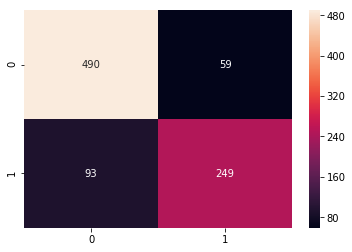

In [79]:
# confusion matrix for the bast model
result= cross_val_predict(ensemble_lin_rbf,X,Y,cv = 10)
cross= cross_val_score(ensemble_lin_rbf,X,Y,cv = 10,scoring = "accuracy")
print(cross.mean())
sns.heatmap(confusion_matrix(Y, result), annot=True, fmt='2.0f')
plt.show()


0.8238290205425038


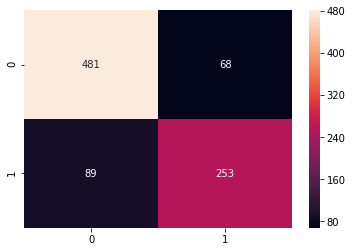

In [115]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
cross= cross_val_score(ada,X,Y, cv = 10,scoring = "accuracy")
print(cross.mean())
result= cross_val_predict(ada,X,Y,cv = 10)
sns.heatmap(confusion_matrix(Y, result), annot=True, fmt='2.0f')
plt.show()